In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pathlib

In [5]:
path0_src = pathlib.Path('./TrainedModels_ref/')
path0_trg = pathlib.Path("./ModelFiles_ref/")

path1_src = pathlib.Path('./TrainedModels/')
path1_trg = pathlib.Path("./ModelFiles/")

# move ref-models to new dir
i = 0
n = 0
for each_file in sorted(path0_src.glob('*/*.pth')):  # grabs all files
    
    # make dir if not exist
    path = path0_trg.joinpath('%.5d' % n)
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)
        
    each_file.rename(path0_trg.joinpath('%.5d' % n + '/' + each_file.name)) # move and rename
    
    # each 4 files should be in different dir
    if (i+1) % 4 == 0:
        n += 1
    
    i += 1

    
# move stego-models to new dir
i = 0
n = 0
for each_file in sorted(path1_src.glob('*/*.pth')):  # grabs all files
    
    # make dir if not exist
    path = path1_trg.joinpath('%.5d' % n)
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)
        
    each_file.rename(path1_trg.joinpath('%.5d' % n + '/' + each_file.name)) # move and rename
    
    # each 4 files should be in different dir
    if (i+1) % 4 == 0:
        n += 1
    
    i += 1

KLD for each model pair: 
 [0.00079516 0.00034201 0.00115401 0.00048783 0.00052386 0.00133627
 0.00670121 0.0021257  0.00026197 0.00052564 0.00222825 0.00033004
 0.00057332 0.00507277 0.00105796 0.00026752 0.00209652 0.00025961
 0.00048893 0.00076674 0.00034795 0.00057757 0.00191177 0.00074766
 0.000397   0.00036323 0.00070454 0.00056228 0.00108906 0.00027151
 0.00092575 0.00135883 0.00357615 0.00104638 0.00038633 0.00212522
 0.00073762 0.00241457 0.00027714 0.00037203] 

Number of model pairs: 
 40 

Average KLD: 
 0.0011896979870196554 



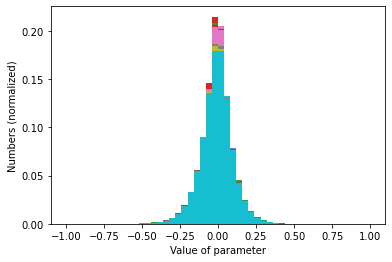

In [6]:
path0 = pathlib.Path('./ModelFiles_ref/')
files0 = list(path0.glob('*/G.pth'))

path1 = pathlib.Path('./ModelFiles/')
files1 = list(path1.glob('*/G.pth'))

dist_0 = []

for i in range(len(files0)):

    model = torch.load(str(files0[i]), map_location='cpu')
    params = []
    for param in model.parameters():
        params.append(param.view(-1))
    params = torch.cat(params)

    x = params.detach().numpy()

    weights = np.ones_like(x) / len(x)

    dist, bins, patches = plt.hist(x, range=(-1, 1), bins=50, weights=weights)
    plt.xlabel('Value of parameter')
    plt.ylabel('Numbers (normalized)')
    dist_0.append(dist)

dist_0 = np.asarray(dist_0)

plt.savefig('total_dist_0.pdf', bbox_inches='tight')



dist_1=[]

for i in range(len(files1)):

    model = torch.load(str(files1[i]),map_location ='cpu')

    params = []
    for param in model.parameters():
        params.append(param.view(-1))
    params = torch.cat(params)

    x = params.detach().numpy()

    weights = np.ones_like(x) / len(x)

    dist, bins, patches = plt.hist(x, range=(-1,1), bins=50, weights=weights)
    plt.xlabel('Value of parameter')
    plt.ylabel('Numbers (normalized)')
    dist_1.append(dist)


dist_1 = np.asarray(dist_1)

plt.savefig('total_dist_1.pdf', bbox_inches='tight')

kld_1 = []
for i in range(len(dist_0)):
    div = sum(scipy.special.kl_div(dist_0[i] + 1e-9, dist_1[i] + 1e-9))
    kld_1.append(div)

kld_1 = np.asarray(kld_1)

print('KLD for each model pair: \n', kld_1, '\n')
print('Number of model pairs: \n', len(kld_1), '\n')
print('Average KLD: \n', np.mean(kld_1), '\n')